# leadtime and frequency (distance)
1. find the opitimal components of the clustering
2. cluster the data

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
from scipy.special import boxcox
import os
from os import path
import sklearn 
from sklearn.model_selection import train_test_split
import chart_studio.plotly as py
import plotly.offline as offline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from plotly.graph_objs import Scatter, Figure, Layout
from plotly import tools

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv',dtype={'customer_zip_code_prefix':str})
order_items  =pd.read_csv('olist_order_items_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv',dtype={'seller_zip_code_prefix':str})
product = pd.read_csv('olist_products_dataset.csv')
translation = pd.read_csv('product_category_name_translation.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv',dtype={'geolocation_zip_code_prefix':str})
reviews = pd.read_csv('olist_order_reviews_dataset.csv')

In [3]:
customers.customer_unique_id.describe()

count                                99441
unique                               96096
top       8d50f5eadf50201ccdcedfb9e2ac8455
freq                                    17
Name: customer_unique_id, dtype: object

In [4]:
data = pd.merge(product,
                translation,
                on=['product_category_name'],
               )[['product_id','product_category_name_english','product_category_name']]
data.describe()

product_id product_category_name_english  \
count                              32328                         32328   
unique                             32328                            71   
top     8cab8abac59158715e0d70a36c807415                bed_bath_table   
freq                                   1                          3029   

       product_category_name  
count                  32328  
unique                    71  
top          cama_mesa_banho  
freq                    3029

In [5]:
data1 = pd.merge(data,
               order_items,
               on=['product_id'],
               )
data1.head()

product_id product_category_name_english  \
0  1e9e8ef04dbcff4541ed26657ea517e5                     perfumery   
1  6a2fb4dd53d2cdb88e0432f1284a004c                     perfumery   
2  6a2fb4dd53d2cdb88e0432f1284a004c                     perfumery   
3  0d009643171aee696f4733340bc2fdd0                     perfumery   
4  0d009643171aee696f4733340bc2fdd0                     perfumery   

  product_category_name                          order_id  order_item_id  \
0            perfumaria  e17e4f88e31525f7deef66779844ddce              1   
1            perfumaria  048cc42e03ca8d43c729adf6962cb348              1   
2            perfumaria  5fa78e91b5cb84b6a8ccc42733f95742              1   
3            perfumaria  24b1c4d88fdb7a2dc87f8ecc7d8f47f1              1   
4            perfumaria  7b13c77c64a9a956500cbf1a9a23798d              1   

                          seller_id  shipping_limit_date   price  \
0  5670f4db5b62c43d542e1b2d56b0cf7c  2018-04-30 17:33:54   10.91   
1  7040e82f899a04d1b434b795a43b4617  2017-11-23 21:31:31   16.90   
2  7040e82f899a04d1b434b795a43b4617  2017-12-14 16:33:14   16.90   
3  fe2032dab1a61af8794248c8196565c9  2017-08-03 09:50:14  339.00   
4  7178f9f4dd81dcef02f62acdf8151e01  2018-05-30 10:38:35  275.00   

   freight_value  
0           7.39  
1           7.78  
2           7.78  
3          17.13  
4          23.48

In [6]:
data2 = pd.merge(data1,
                 orders,
                 on=['order_id'])
data2.head()

product_id product_category_name_english  \
0  1e9e8ef04dbcff4541ed26657ea517e5                     perfumery   
1  6a2fb4dd53d2cdb88e0432f1284a004c                     perfumery   
2  6a2fb4dd53d2cdb88e0432f1284a004c                     perfumery   
3  0d009643171aee696f4733340bc2fdd0                     perfumery   
4  0d009643171aee696f4733340bc2fdd0                     perfumery   

  product_category_name                          order_id  order_item_id  \
0            perfumaria  e17e4f88e31525f7deef66779844ddce              1   
1            perfumaria  048cc42e03ca8d43c729adf6962cb348              1   
2            perfumaria  5fa78e91b5cb84b6a8ccc42733f95742              1   
3            perfumaria  24b1c4d88fdb7a2dc87f8ecc7d8f47f1              1   
4            perfumaria  7b13c77c64a9a956500cbf1a9a23798d              1   

                          seller_id  shipping_limit_date   price  \
0  5670f4db5b62c43d542e1b2d56b0cf7c  2018-04-30 17:33:54   10.91   
1  7040e82f899a04d1b434b795a43b4617  2017-11-23 21:31:31   16.90   
2  7040e82f899a04d1b434b795a43b4617  2017-12-14 16:33:14   16.90   
3  fe2032dab1a61af8794248c8196565c9  2017-08-03 09:50:14  339.00   
4  7178f9f4dd81dcef02f62acdf8151e01  2018-05-30 10:38:35  275.00   

   freight_value                       customer_id order_status  \
0           7.39  f8a3e963a310aa58b60a5b1fed5bceb5    delivered   
1           7.78  12a2c614dfc8926e793516b1638c7471    delivered   
2           7.78  c15eed3881abc9e06763c989679c5094    delivered   
3          17.13  6d699e3ab0fd90fffb3d1379d937de77    delivered   
4          23.48  45d942b1af5529f8990f27848a40e645    delivered   

  order_purchase_timestamp    order_approved_at order_delivered_carrier_date  \
0      2018-04-24 16:16:53  2018-04-24 19:04:19          2018-04-25 17:01:00   
1      2017-11-16 21:28:00  2017-11-17 21:35:39          2017-11-21 22:14:50   
2      2017-11-30 01:51:23  2017-12-08 16:33:14          2017-12-09 00:53:08   
3      2017-07-28 09:34:29  2017-07-28 09:50:14          2017-07-28 21:42:11   
4      2018-05-17 09:24:18  2018-05-17 10:38:35          2018-06-01 09:04:00   

  order_delivered_customer_date order_estimated_delivery_date  
0           2018-04-27 16:42:17           2018-05-09 00:00:00  
1           2017-11-23 15:39:38           2017-11-29 00:00:00  
2           2017-12-13 20:52:32           2017-12-18 00:00:00  
3           2017-08-08 16:03:45           2017-08-21 00:00:00  
4           2018-06-07 19:12:50           2018-06-05 00:00:00

In [7]:
data3 = pd.merge(data2,
                 reviews,
                 on=['order_id'])
data3.head()

product_id product_category_name_english  \
0  1e9e8ef04dbcff4541ed26657ea517e5                     perfumery   
1  6a2fb4dd53d2cdb88e0432f1284a004c                     perfumery   
2  6a2fb4dd53d2cdb88e0432f1284a004c                     perfumery   
3  0d009643171aee696f4733340bc2fdd0                     perfumery   
4  0d009643171aee696f4733340bc2fdd0                     perfumery   

  product_category_name                          order_id  order_item_id  \
0            perfumaria  e17e4f88e31525f7deef66779844ddce              1   
1            perfumaria  048cc42e03ca8d43c729adf6962cb348              1   
2            perfumaria  5fa78e91b5cb84b6a8ccc42733f95742              1   
3            perfumaria  24b1c4d88fdb7a2dc87f8ecc7d8f47f1              1   
4            perfumaria  7b13c77c64a9a956500cbf1a9a23798d              1   

                          seller_id  shipping_limit_date   price  \
0  5670f4db5b62c43d542e1b2d56b0cf7c  2018-04-30 17:33:54   10.91   
1  7040e82f899a04d1b434b795a43b4617  2017-11-23 21:31:31   16.90   
2  7040e82f899a04d1b434b795a43b4617  2017-12-14 16:33:14   16.90   
3  fe2032dab1a61af8794248c8196565c9  2017-08-03 09:50:14  339.00   
4  7178f9f4dd81dcef02f62acdf8151e01  2018-05-30 10:38:35  275.00   

   freight_value                       customer_id  ...    order_approved_at  \
0           7.39  f8a3e963a310aa58b60a5b1fed5bceb5  ...  2018-04-24 19:04:19   
1           7.78  12a2c614dfc8926e793516b1638c7471  ...  2017-11-17 21:35:39   
2           7.78  c15eed3881abc9e06763c989679c5094  ...  2017-12-08 16:33:14   
3          17.13  6d699e3ab0fd90fffb3d1379d937de77  ...  2017-07-28 09:50:14   
4          23.48  45d942b1af5529f8990f27848a40e645  ...  2018-05-17 10:38:35   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2018-04-25 17:01:00           2018-04-27 16:42:17   
1          2017-11-21 22:14:50           2017-11-23 15:39:38   
2          2017-12-09 00:53:08           2017-12-13 20:52:32   
3          2017-07-28 21:42:11           2017-08-08 16:03:45   
4          2018-06-01 09:04:00           2018-06-07 19:12:50   

  order_estimated_delivery_date                         review_id  \
0           2018-05-09 00:00:00  d71da8fd8c6e3adef26be965f065b8a1   
1           2017-11-29 00:00:00  0d953190c8ed55747f7b7ad3af2885e3   
2           2017-12-18 00:00:00  8e762254a11ad4292ec8fb6586c681cf   
3           2017-08-21 00:00:00  de311dfd0cf46c629921db407a7d87e9   
4           2018-06-05 00:00:00  097582b6b0630f5cb1a409c223c406dc   

  review_score   review_comment_title  \
0            5           Vale a pena    
1            5                    NaN   
2            2                    NaN   
3            5                    NaN   
4            3  Não passou confiança    

                              review_comment_message review_creation_date  \
0  Super adooorei o delineador ele é bem preto e ...  2018-04-28 00:00:00   
1  O produto que chegou é mais bonito do que eu e...  2017-11-24 00:00:00   
2                                                NaN  2017-12-14 00:00:00   
3  ótimo produto e ótima loja para comprar pelo s...  2017-08-09 00:00:00   
4  O fornecedor e a nf é de São Paulo, o produto ...  2018-06-07 00:00:00   

  review_answer_timestamp  
0     2018-05-04 00:55:02  
1     2017-11-24 18:34:45  
2     2017-12-17 02:57:05  
3     2017-08-09 19:30:09  
4     2018-06-12 13:44:18  

[5 rows x 22 columns]

In [8]:
data4 = pd.merge(data3,
                sellers,
                on=['seller_id'])
data4.head()

product_id product_category_name_english  \
0  1e9e8ef04dbcff4541ed26657ea517e5                     perfumery   
1  a035b83b3628decee6e3823924e0c10f                     perfumery   
2  091107484dd7172f5dcfed173e4a960e                     perfumery   
3  ccac9976bafbf7e587bd2c29302e2314                     perfumery   
4  2eadf6089620e82047e4d24101dc6759                     perfumery   

  product_category_name                          order_id  order_item_id  \
0            perfumaria  e17e4f88e31525f7deef66779844ddce              1   
1            perfumaria  b18cb761efbe70da4838435a349abd07              1   
2            perfumaria  a7708ffa8966514c098d15e1abfa6417              1   
3            perfumaria  206d1a13596872a713dba14504fdf699              1   
4            perfumaria  f8bb4d404d187c79b86ccf852dfa345e              1   

                          seller_id  shipping_limit_date   price  \
0  5670f4db5b62c43d542e1b2d56b0cf7c  2018-04-30 17:33:54   10.91   
1  5670f4db5b62c43d542e1b2d56b0cf7c  2018-07-06 19:31:03  268.38   
2  5670f4db5b62c43d542e1b2d56b0cf7c  2018-04-27 19:31:35    7.65   
3  5670f4db5b62c43d542e1b2d56b0cf7c  2018-08-01 16:35:17  268.38   
4  5670f4db5b62c43d542e1b2d56b0cf7c  2018-06-20 21:58:24   16.88   

   freight_value                       customer_id  ...  \
0           7.39  f8a3e963a310aa58b60a5b1fed5bceb5  ...   
1          21.07  9ff6d1a05ecfe2d907adac11a2e2bfe9  ...   
2          10.55  360782688ff472f1adbd47a85861751e  ...   
3          18.07  58c5eb8e7844d1ecd85128e663f49e04  ...   
4           7.39  52a9800a9341855f5ebf8b0b8b1fd906  ...   

  order_estimated_delivery_date                         review_id  \
0           2018-05-09 00:00:00  d71da8fd8c6e3adef26be965f065b8a1   
1           2018-07-27 00:00:00  0f0f85749cb82321d902e390a9c33694   
2           2018-05-15 00:00:00  39489f8518181b82cb86ce264e1ccc55   
3           2018-08-15 00:00:00  36b616f738d1f617cc12aeb2c01705f3   
4           2018-06-28 00:00:00  c228a122ffc0ccc9a91558dcb49de760   

  review_score review_comment_title  \
0            5         Vale a pena    
1            4                  NaN   
2            5            Agora sim   
3            3                  NaN   
4            4                  NaN   

                              review_comment_message review_creation_date  \
0  Super adooorei o delineador ele é bem preto e ...  2018-04-28 00:00:00   
1                                                NaN  2018-07-11 00:00:00   
2         Recebido o pedido finalmente produto ótimo  2018-04-26 00:00:00   
3                                                NaN  2018-08-07 00:00:00   
4                                                NaN  2018-06-21 00:00:00   

  review_answer_timestamp  seller_zip_code_prefix seller_city seller_state  
0     2018-05-04 00:55:02                   03694   sao paulo           SP  
1     2018-07-15 21:32:04                   03694   sao paulo           SP  
2     2018-04-30 21:15:06                   03694   sao paulo           SP  
3     2018-08-07 22:56:38                   03694   sao paulo           SP  
4     2018-06-22 12:12:26                   03694   sao paulo           SP  

[5 rows x 25 columns]

In [12]:
data5 = pd.merge(data4,
                customers,
                on=['customer_id'])
data5.head()

product_id product_category_name_english  \
0  1e9e8ef04dbcff4541ed26657ea517e5                     perfumery   
1  a035b83b3628decee6e3823924e0c10f                     perfumery   
2  091107484dd7172f5dcfed173e4a960e                     perfumery   
3  e8b61f78db501ea0ca45677d1ca27de2                          toys   
4  ccac9976bafbf7e587bd2c29302e2314                     perfumery   

  product_category_name                          order_id  order_item_id  \
0            perfumaria  e17e4f88e31525f7deef66779844ddce              1   
1            perfumaria  b18cb761efbe70da4838435a349abd07              1   
2            perfumaria  a7708ffa8966514c098d15e1abfa6417              1   
3            brinquedos  a7708ffa8966514c098d15e1abfa6417              2   
4            perfumaria  206d1a13596872a713dba14504fdf699              1   

                          seller_id  shipping_limit_date   price  \
0  5670f4db5b62c43d542e1b2d56b0cf7c  2018-04-30 17:33:54   10.91   
1  5670f4db5b62c43d542e1b2d56b0cf7c  2018-07-06 19:31:03  268.38   
2  5670f4db5b62c43d542e1b2d56b0cf7c  2018-04-27 19:31:35    7.65   
3  3d871de0142ce09b7081e2b9d1733cb1  2018-04-27 19:31:35   29.00   
4  5670f4db5b62c43d542e1b2d56b0cf7c  2018-08-01 16:35:17  268.38   

   freight_value                       customer_id  ...  \
0           7.39  f8a3e963a310aa58b60a5b1fed5bceb5  ...   
1          21.07  9ff6d1a05ecfe2d907adac11a2e2bfe9  ...   
2          10.55  360782688ff472f1adbd47a85861751e  ...   
3          10.55  360782688ff472f1adbd47a85861751e  ...   
4          18.07  58c5eb8e7844d1ecd85128e663f49e04  ...   

                              review_comment_message review_creation_date  \
0  Super adooorei o delineador ele é bem preto e ...  2018-04-28 00:00:00   
1                                                NaN  2018-07-11 00:00:00   
2         Recebido o pedido finalmente produto ótimo  2018-04-26 00:00:00   
3         Recebido o pedido finalmente produto ótimo  2018-04-26 00:00:00   
4                                                NaN  2018-08-07 00:00:00   

  review_answer_timestamp seller_zip_code_prefix           seller_city  \
0     2018-05-04 00:55:02                  03694             sao paulo   
1     2018-07-15 21:32:04                  03694             sao paulo   
2     2018-04-30 21:15:06                  03694             sao paulo   
3     2018-04-30 21:15:06                  13232  campo limpo paulista   
4     2018-08-07 22:56:38                  03694             sao paulo   

  seller_state                customer_unique_id  customer_zip_code_prefix  \
0           SP  b1a1199364a4a7fe27c4486ab63f550d                     13848   
1           SP  fc68ba9c34778e17224154c255b5656e                     84200   
2           SP  c67329fd07872a68d6d6d1f1626a0760                     03804   
3           SP  c67329fd07872a68d6d6d1f1626a0760                     03804   
4           SP  1b6d2664b20a04a1fa9c900aedf29440                     71920   

  customer_city customer_state  
0    mogi-guacu             SP  
1   jaguariaiva             PR  
2     sao paulo             SP  
3     sao paulo             SP  
4      brasilia             DF  

[5 rows x 29 columns]

In [13]:
data6 = data5.rename(columns={'product_category_name_english':'category','order_item_id':'item'})

In [303]:
import datetime as dt
data6['shipping_limit_date'] = pd.to_datetime(data6.shipping_limit_date)
data6['order_purchase_timestamp'] = pd.to_datetime(data6.order_purchase_timestamp)
data6['order_approved_at'] = pd.to_datetime(data6.order_approved_at)
data6['order_delivered_carrier_date'] = pd.to_datetime(data6.order_delivered_carrier_date)
data6['order_delivered_customer_date'] = pd.to_datetime(data6.order_delivered_customer_date)
data6['order_estimated_delivery_date'] = pd.to_datetime(data6.order_estimated_delivery_date)


In [304]:
olist_data = data6.loc[(data6.order_delivered_carrier_date.notnull())&
          (data6.order_approved_at.notnull())&
         (data6.order_delivered_customer_date.notnull())]

In [305]:
olist_data.head()

category product_category_name  item shipping_limit_date   price  \
0  perfumery            perfumaria     1 2018-04-30 17:33:54   10.91   
1  perfumery            perfumaria     1 2018-07-06 19:31:03  268.38   
2  perfumery            perfumaria     1 2018-04-27 19:31:35    7.65   
3       toys            brinquedos     2 2018-04-27 19:31:35   29.00   
4  perfumery            perfumaria     1 2018-08-01 16:35:17  268.38   

   freight_value order_status order_purchase_timestamp   order_approved_at  \
0           7.39    delivered      2018-04-24 16:16:53 2018-04-24 19:04:19   
1          21.07    delivered      2018-07-04 18:39:28 2018-07-05 16:33:14   
2          10.55    delivered      2018-04-23 19:03:35 2018-04-24 19:17:45   
3          10.55    delivered      2018-04-23 19:03:35 2018-04-24 19:17:45   
4          18.07    delivered      2018-07-29 20:50:22 2018-07-30 18:31:13   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2018-04-25 17:01:00           2018-04-27 16:42:17   
1          2018-07-05 13:21:00           2018-07-10 22:34:39   
2          2018-04-24 16:22:36           2018-04-25 23:02:39   
3          2018-04-24 16:22:36           2018-04-25 23:02:39   
4          2018-08-01 15:24:00           2018-08-06 18:36:46   

  order_estimated_delivery_date  review_score seller_zip_code_prefix  \
0                    2018-05-09             5                  03694   
1                    2018-07-27             4                  03694   
2                    2018-05-15             5                  03694   
3                    2018-05-15             5                  13232   
4                    2018-08-15             3                  03694   

            seller_city seller_state                customer_unique_id  \
0             sao paulo           SP  b1a1199364a4a7fe27c4486ab63f550d   
1             sao paulo           SP  fc68ba9c34778e17224154c255b5656e   
2             sao paulo           SP  c67329fd07872a68d6d6d1f1626a0760   
3  campo limpo paulista           SP  c67329fd07872a68d6d6d1f1626a0760   
4             sao paulo           SP  1b6d2664b20a04a1fa9c900aedf29440   

  customer_zip_code_prefix customer_city customer_state  
0                    13848    mogi-guacu             SP  
1                    84200   jaguariaiva             PR  
2                    03804     sao paulo             SP  
3                    03804     sao paulo             SP  
4                    71920      brasilia             DF

In [415]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
seller_id                 3095 non-null object
seller_zip_code_prefix    3095 non-null object
seller_city               3095 non-null object
seller_state              3095 non-null object
dtypes: object(4)
memory usage: 96.8+ KB


In [306]:
olist_data['delay'] = olist_data.order_delivered_customer_date - olist_data.order_approved_at
olist_data['delay_est'] = olist_data.order_estimated_delivery_date - olist_data.order_approved_at
olist_data['delay'] = olist_data.delay.apply(lambda x:x/np.timedelta64(1,'D'))
olist_data['delay_est'] = olist_data.delay_est.apply(lambda x:x/np.timedelta64(1,'D'))



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda

In [409]:
olist_data.customer_zip_code_prefix_3_digits.describe()

count     109265
unique       851
top          130
freq        1573
Name: customer_zip_code_prefix_3_digits, dtype: object

In [314]:
clustering_data = olist_data[['category','delay','freight_value','price',
                              'customer_zip_code_prefix_3_digits','item','review_score']]
clustering_data



category      delay  freight_value   price  \
0                               perfumery   2.901366           7.39   10.91   
1                               perfumery   5.250984          21.07  268.38   
2                               perfumery   1.156181          10.55    7.65   
3                                    toys   1.156181          10.55   29.00   
4                               perfumery   7.003854          18.07  268.38   
...                                   ...        ...            ...     ...   
111681                diapers_and_hygiene   3.182975          19.08  139.89   
111682                            flowers  11.507095          17.14   30.00   
111683  furniture_mattress_and_upholstery  11.712002          17.18  249.00   
111684  furniture_mattress_and_upholstery  49.765833          39.29  249.00   
111685  furniture_mattress_and_upholstery   6.070486           9.33  249.00   

       customer_zip_code_prefix_3_digits  item  review_score  
0                                    138     1             5  
1                                    842     1             4  
2                                    038     1             5  
3                                    038     2             5  
4                                    719     1             3  
...                                  ...   ...           ...  
111681                               031     1             5  
111682                               904     1             5  
111683                               095     1             1  
111684                               595     1             1  
111685                               704     1             5  

[109265 rows x 7 columns]

In [341]:
a = int(agg_data.item.quantile(q=2/3))
a

142

In [376]:
agg_data = clustering_data.groupby('customer_zip_code_prefix_3_digits').agg({'delay':'mean',
                                                                             'freight_value':'mean',
                                                                             'review_score':'mean',
                                                                             'price':'mean',
                                                                            'item':'sum'}).reset_index()
agg_data.head()

customer_zip_code_prefix_3_digits     delay  freight_value  review_score  \
0                               010  6.258368      14.562619      3.940476   
1                               011  7.489297      15.297867      4.320000   
2                               012  7.590787      14.513778      4.199095   
3                               013  7.074810      15.018629      4.293011   
4                               014  6.764358      14.379531      4.323944   

        price  item  
0  137.889524   197  
1  115.773000   168  
2  124.740656   546  
3  103.255430   456  
4  128.271620   499

In [363]:

# list1 = []
# for rev in agg_data.review_score:
#     if rev >= 4:
#         list1.append('high')
#     if rev >3 and rev <4:
#         list1.append('mid')
#     if rev <= 3:
#         list1.append('low')

In [382]:
# a = int(agg_data.item.quantile(q=2/3))
# b = int(agg_data.item.quantile(q=1/3))
# list = []
# for frequency in agg_data.item:
#     if frequency > a:
#         list.append(0)
#     if frequency <= a and frequency >= b:
#         list.append(1)
#     if frequency < b:
#         list.append(2)

In [ ]:
high_frequency = total_item.loc[total_item.item>total_item.item.quantile(q=2/3)]
mid_frequency = total_item.loc[(total_item.item>=total_item.item.quantile(q=1/3))&
                             (total_item.item<=total_item.item.quantile(q=2/3))]

low_frequency = total_item.loc[total_item.item<total_item.item.quantile(q=1/3)]

In [322]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train = agg_data
X_train_maxmin = min_max_scaler.fit_transform(X_train)
X_train_maxmin

array([[0.        , 0.00722626, 0.092287  , 0.70568783, 0.10001242,
        0.10509383],
       [0.00101112, 0.04485692, 0.10468578, 0.81111111, 0.08110536,
        0.08954424],
       [0.00202224, 0.04795957, 0.09146338, 0.7775264 , 0.08877167,
        0.2922252 ],
       ...,
       [0.99797776, 0.28062904, 0.19571123, 0.68093093, 0.07038071,
        0.04182306],
       [0.99898888, 0.26405536, 0.1763842 , 0.84953704, 0.06455475,
        0.01340483],
       [1.        , 0.25668307, 0.21151864, 0.85339506, 0.07595735,
        0.01930295]])

In [385]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train_maxmin[:,1:6])
pca_result

array([[-0.27385568, -0.01171171],
       [-0.25198395, -0.07747644],
       [-0.30640237,  0.03412668],
       ...,
       [-0.00207799,  0.05868701],
       [-0.04215203, -0.06891873],
       [-0.02478249, -0.08758046]])

In [387]:
principal_cifar_Df = pd.DataFrame(data = pca_result
             , columns = ['principal component 1', 'principal component 2'])

principal_cifar_Df

principal component 1  principal component 2
0                -0.273856              -0.011712
1                -0.251984              -0.077476
2                -0.306402               0.034127
3                -0.304053              -0.010648
4                -0.322907              -0.010506
..                     ...                    ...
846              -0.048770              -0.031644
847               0.087041              -0.095802
848              -0.002078               0.058687
849              -0.042152              -0.068919
850              -0.024782              -0.087580

[851 rows x 2 columns]

In [373]:
clustering_data.head()

category     delay  freight_value   price  \
0  perfumery  2.901366           7.39   10.91   
1  perfumery  5.250984          21.07  268.38   
2  perfumery  1.156181          10.55    7.65   
3       toys  1.156181          10.55   29.00   
4  perfumery  7.003854          18.07  268.38   

  customer_zip_code_prefix_3_digits  item  review_score  
0                               138     1             5  
1                               842     1             4  
2                               038     1             5  
3                               038     2             5  
4                               719     1             3

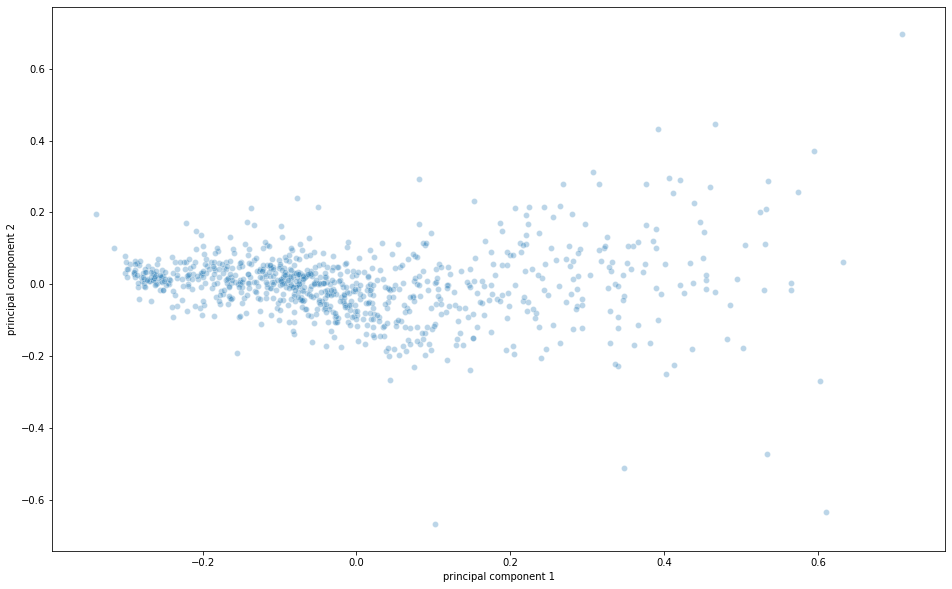

In [386]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
#     hue="label",
    palette=sns.color_palette("hls", 3),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

In [396]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(principal_cifar_Df)
predict = pd.Series(model.predict(principal_cifar_Df))
# groupby_case['prediction'] = predict
# # groupby_case
# groupby_case
cluster_data = pd.DataFrame(principal_cifar_Df)
cluster_data
cluster_data['prediction']  = predict
cluster_data.columns  =['principal1','principal2','prediction']
cluster_data

principal1  principal2  prediction
0     -0.273856   -0.011712           3
1     -0.251984   -0.077476           3
2     -0.306402    0.034127           3
3     -0.304053   -0.010648           3
4     -0.322907   -0.010506           3
..          ...         ...         ...
846   -0.048770   -0.031644           0
847    0.087041   -0.095802           1
848   -0.002078    0.058687           1
849   -0.042152   -0.068919           0
850   -0.024782   -0.087580           0

[851 rows x 3 columns]

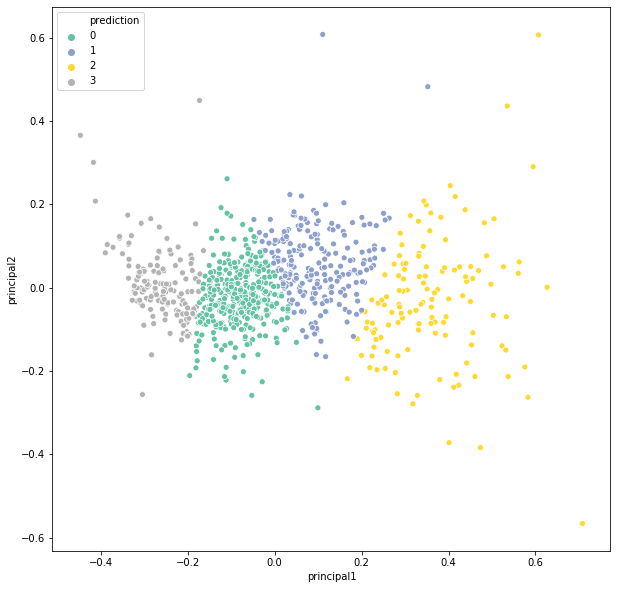

In [397]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=cluster_data.principal1,y=cluster_data.principal2,hue=cluster_data.prediction,
               palette='Set2')
plt.show()

In [398]:
cluster_data

principal1  principal2  prediction
0     -0.273856   -0.011712           3
1     -0.251984   -0.077476           3
2     -0.306402    0.034127           3
3     -0.304053   -0.010648           3
4     -0.322907   -0.010506           3
..          ...         ...         ...
846   -0.048770   -0.031644           0
847    0.087041   -0.095802           1
848   -0.002078    0.058687           1
849   -0.042152   -0.068919           0
850   -0.024782   -0.087580           0

[851 rows x 3 columns]

In [402]:
agg_data['label'] = cluster_data.prediction
data_new = agg_data.groupby('label').mean()

In [403]:
data_new

delay  freight_value  review_score       price        item
label                                                                
0      12.324536      20.617070      4.145013  121.866216  136.246575
1      17.442241      25.408690      3.857398  131.145109   93.369159
2      21.502037      40.914787      3.982508  171.666036   42.078125
3       8.385063      15.089026      4.186445  106.834002  388.562500

In [308]:
olist_data['customer_zip_code_prefix_1_digits'] = olist_data['customer_zip_code_prefix'].str[0:1]
olist_data['customer_zip_code_prefix_2_digits'] = olist_data['customer_zip_code_prefix'].str[0:2]
olist_data['customer_zip_code_prefix_3_digits'] = olist_data['customer_zip_code_prefix'].str[0:3]
olist_data['customer_zip_code_prefix_4_digits'] = olist_data['customer_zip_code_prefix'].str[0:4]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda

In [309]:
olist_data.head()

category product_category_name  item shipping_limit_date   price  \
0  perfumery            perfumaria     1 2018-04-30 17:33:54   10.91   
1  perfumery            perfumaria     1 2018-07-06 19:31:03  268.38   
2  perfumery            perfumaria     1 2018-04-27 19:31:35    7.65   
3       toys            brinquedos     2 2018-04-27 19:31:35   29.00   
4  perfumery            perfumaria     1 2018-08-01 16:35:17  268.38   

   freight_value order_status order_purchase_timestamp   order_approved_at  \
0           7.39    delivered      2018-04-24 16:16:53 2018-04-24 19:04:19   
1          21.07    delivered      2018-07-04 18:39:28 2018-07-05 16:33:14   
2          10.55    delivered      2018-04-23 19:03:35 2018-04-24 19:17:45   
3          10.55    delivered      2018-04-23 19:03:35 2018-04-24 19:17:45   
4          18.07    delivered      2018-07-29 20:50:22 2018-07-30 18:31:13   

  order_delivered_carrier_date  ...                customer_unique_id  \
0          2018-04-25 17:01:00  ...  b1a1199364a4a7fe27c4486ab63f550d   
1          2018-07-05 13:21:00  ...  fc68ba9c34778e17224154c255b5656e   
2          2018-04-24 16:22:36  ...  c67329fd07872a68d6d6d1f1626a0760   
3          2018-04-24 16:22:36  ...  c67329fd07872a68d6d6d1f1626a0760   
4          2018-08-01 15:24:00  ...  1b6d2664b20a04a1fa9c900aedf29440   

  customer_zip_code_prefix  customer_city customer_state     delay  delay_est  \
0                    13848     mogi-guacu             SP  2.901366  14.205336   
1                    84200    jaguariaiva             PR  5.250984  21.310255   
2                    03804      sao paulo             SP  1.156181  20.196007   
3                    03804      sao paulo             SP  1.156181  20.196007   
4                    71920       brasilia             DF  7.003854  15.228322   

  customer_zip_code_prefix_1_digits customer_zip_code_prefix_2_digits  \
0                                 1                                13   
1                                 8                                84   
2                                 0                                03   
3                                 0                                03   
4                                 7                                71   

  customer_zip_code_prefix_3_digits customer_zip_code_prefix_4_digits  
0                               138                              1384  
1                               842                              8420  
2                               038                              0380  
3                               038                              0380  
4                               719                              7192  

[5 rows x 26 columns]

In [416]:
olist_data.head()

category product_category_name  item shipping_limit_date   price  \
0  perfumery            perfumaria     1 2018-04-30 17:33:54   10.91   
1  perfumery            perfumaria     1 2018-07-06 19:31:03  268.38   
2  perfumery            perfumaria     1 2018-04-27 19:31:35    7.65   
3       toys            brinquedos     2 2018-04-27 19:31:35   29.00   
4  perfumery            perfumaria     1 2018-08-01 16:35:17  268.38   

   freight_value order_status order_purchase_timestamp   order_approved_at  \
0           7.39    delivered      2018-04-24 16:16:53 2018-04-24 19:04:19   
1          21.07    delivered      2018-07-04 18:39:28 2018-07-05 16:33:14   
2          10.55    delivered      2018-04-23 19:03:35 2018-04-24 19:17:45   
3          10.55    delivered      2018-04-23 19:03:35 2018-04-24 19:17:45   
4          18.07    delivered      2018-07-29 20:50:22 2018-07-30 18:31:13   

  order_delivered_carrier_date  ...                customer_unique_id  \
0          2018-04-25 17:01:00  ...  b1a1199364a4a7fe27c4486ab63f550d   
1          2018-07-05 13:21:00  ...  fc68ba9c34778e17224154c255b5656e   
2          2018-04-24 16:22:36  ...  c67329fd07872a68d6d6d1f1626a0760   
3          2018-04-24 16:22:36  ...  c67329fd07872a68d6d6d1f1626a0760   
4          2018-08-01 15:24:00  ...  1b6d2664b20a04a1fa9c900aedf29440   

  customer_zip_code_prefix  customer_city customer_state     delay  delay_est  \
0                    13848     mogi-guacu             SP  2.901366  14.205336   
1                    84200    jaguariaiva             PR  5.250984  21.310255   
2                    03804      sao paulo             SP  1.156181  20.196007   
3                    03804      sao paulo             SP  1.156181  20.196007   
4                    71920       brasilia             DF  7.003854  15.228322   

  customer_zip_code_prefix_1_digits customer_zip_code_prefix_2_digits  \
0                                 1                                13   
1                                 8                                84   
2                                 0                                03   
3                                 0                                03   
4                                 7                                71   

  customer_zip_code_prefix_3_digits customer_zip_code_prefix_4_digits  
0                               138                              1384  
1                               842                              8420  
2                               038                              0380  
3                               038                              0380  
4                               719                              7192  

[5 rows x 26 columns]

In [274]:
olist_data.customer_city.describe()

count        109265
unique         4073
top       sao paulo
freq          17241
Name: customer_city, dtype: object

In [417]:
groupby_case = olist_data.groupby('customer_zip_code_prefix_3_digits')['delay','item','freight_value'].agg({'delay':'mean','item':'sum',
                                                                                                           'freight_value':'mean'})
# groupby_case.item.value_counts()
# sns.kdeplot(groupby_case.item)
# groupby_case.item.describe()
groupby_case.


delay  item  freight_value
customer_zip_code_prefix_3_digits                                
010                                 6.258368   197      14.562619
011                                 7.489297   168      15.297867
012                                 7.590787   546      14.513778
013                                 7.074810   456      15.018629
014                                 6.764358   499      14.379531
...                                      ...   ...            ...
995                                14.016541    35      19.393714
996                                16.161305    42      27.092581
997                                15.201595    79      20.695676
998                                14.659457    26      19.549583
999                                14.418303    37      21.633056

[851 rows x 3 columns]

In [410]:
groupby_case.item.describe()
elimination_case = groupby_case.loc[groupby_case.item>0]
elimination_case

delay  item
customer_zip_code_prefix_3_digits                 
010                                 6.258368   197
011                                 7.489297   168
012                                 7.590787   546
013                                 7.074810   456
014                                 6.764358   499
...                                      ...   ...
995                                14.016541    35
996                                16.161305    42
997                                15.201595    79
998                                14.659457    26
999                                14.418303    37

[851 rows x 2 columns]

In [234]:
groupby_case = elimination_case

In [ ]:
elimination_case.reset_index(inplace=True)


In [ ]:
elimination_case.head()

In [235]:
# from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()
# X_train = groupby_case
# X_train_maxmin = min_max_scaler.fit_transform(X_train)
# X_train_maxmin

array([[0.00737324, 0.08648057],
       [0.05511404, 0.07060755],
       [0.05905026, 0.27750411],
       ...,
       [0.40103636, 0.00164204],
       [0.39145216, 0.00164204],
       [0.35423045, 0.02189381]])

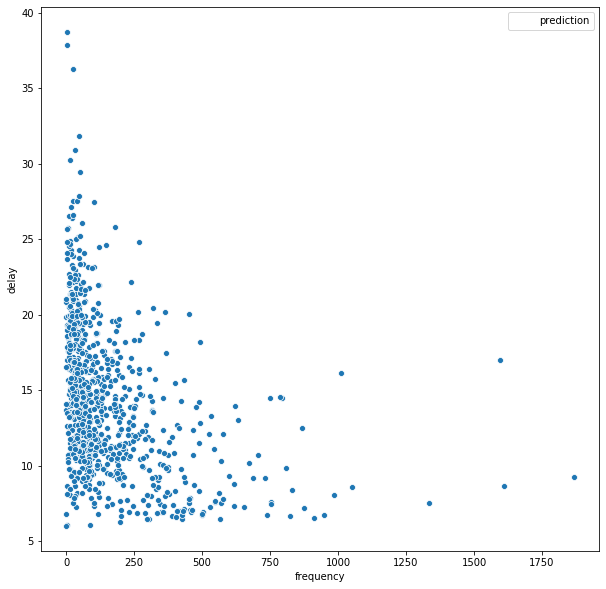

In [411]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(elimination_case)
predict = pd.Series(model.predict(elimination_case))
# groupby_case['prediction'] = predict
# # groupby_case
# groupby_case
cluster_data = pd.DataFrame(elimination_case)
cluster_data['prediction']  = predict
cluster_data.columns  =['delay','frequency','prediction']
plt.figure(figsize=(10,10))
sns.scatterplot(x=cluster_data.frequency,y=cluster_data.delay,hue=cluster_data.prediction,
               palette='Set2')
plt.show()

In [237]:
groupby_case.reset_index(inplace=True)
groupby_case.item.describe()

count     631.000000
mean      200.568938
std       209.306848
min        39.000000
25%        69.500000
50%       123.000000
75%       248.500000
max      1866.000000
Name: item, dtype: float64

In [285]:
elimination_case.reset_index(inplace=True)
elimination_case.drop('customer_zip_code_prefix_3_digits',axis=1,inplace=True)
elimination_case.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



delay  item
0  6.258368   197
1  7.489297   168
2  7.590787   546
3  7.074810   456
4  6.764358   499

In [245]:
cluster_data

delay  frequency  prediction
0    0.007373   0.086481           0
1    0.055114   0.070608           0
2    0.059050   0.277504           2
3    0.039038   0.228243           2
4    0.026998   0.251779           2
..        ...        ...         ...
626  0.291057   0.000547           3
627  0.350396   0.022989           3
628  0.401036   0.001642           3
629  0.391452   0.001642           3
630  0.354230   0.021894           3

[631 rows x 3 columns]

In [278]:
elimination_case.drop('customer_zip_code_prefix_3_digits',axis=1,inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [279]:
elimination_case

delay  item
0     6.068259    87
1     7.279677    35
2     7.843197    92
3     8.196418    42
4    11.131322    61
..         ...   ...
468  14.016541    35
469  16.161305    42
470  15.201595    79
471  14.659457    26
472  14.418303    37

[473 rows x 2 columns]

In [287]:
predict = pd.Series(model.predict(elimination_case))
# groupby_case['prediction'] = predict
# # groupby_case
# groupby_case
cluster_data = pd.DataFrame(elimination_case)
cluster_data['prediction']  = predict
cluster_data.columns  =['delay','frequency','prediction']


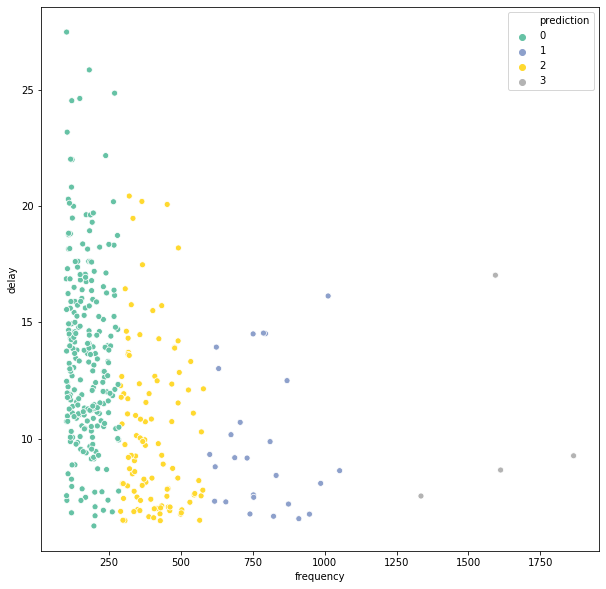

In [288]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=cluster_data.frequency,y=cluster_data.delay,hue=cluster_data.prediction,
               palette='Set2')
plt.show()

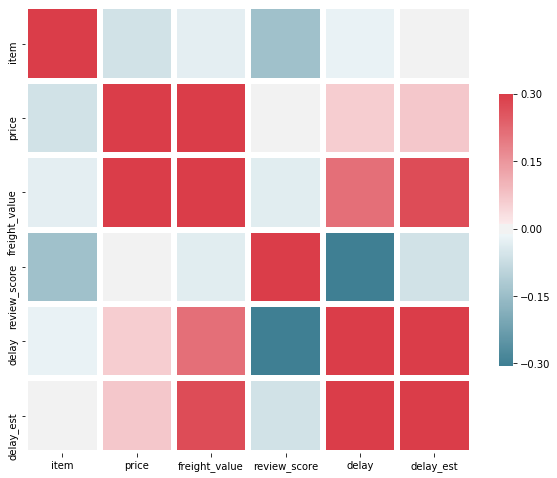

In [292]:
plt.figure(figsize=(10,10))
corr = olist_data.corr()
mask = np.zeros_like(corr,dtype=np.bool)
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=0.3,center=0,
           square=True,linewidths=5,cbar_kws={'shrink':.5})

In [282]:
model.predict(elimination_case)

ValueError: Incorrect number of features. Got 3 features, expected 2

In [ ]:
olist

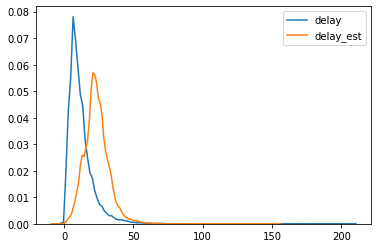

In [22]:
sns.kdeplot(olist_data.delay)
sns.kdeplot(olist_data.delay_est)

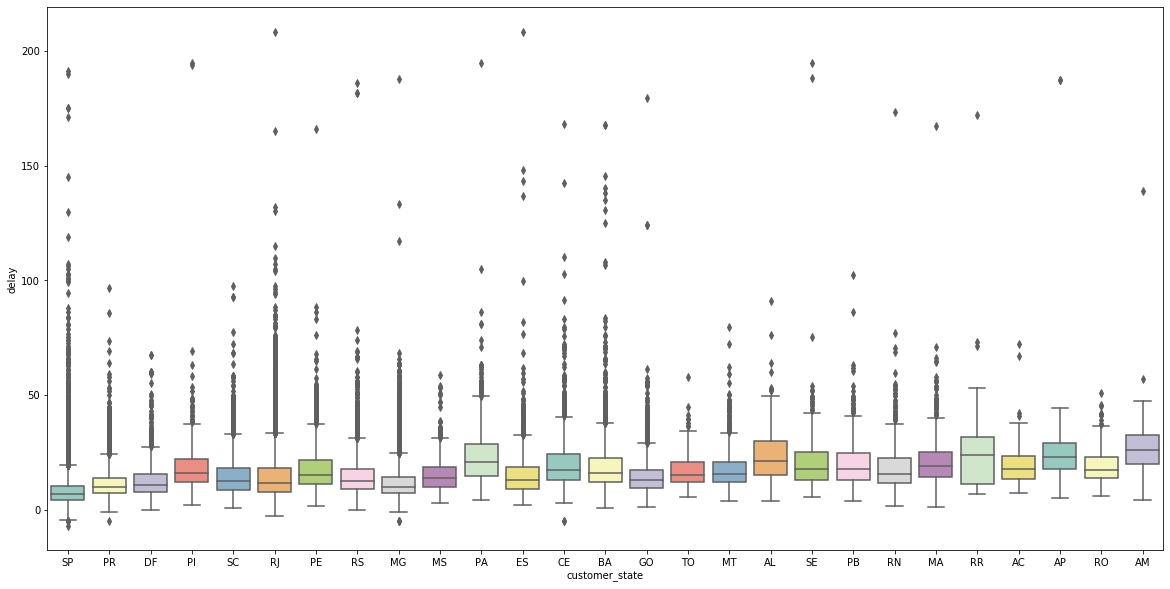

In [23]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(x="customer_state", 
            y="delay", 
            data=olist_data, palette="Set3")

In [24]:
# set boundary
def lim_delay(x):
    if x > 90:
        return 90
    else:
        return x
olist_data.delay = olist_data.delay.apply(lim_delay)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



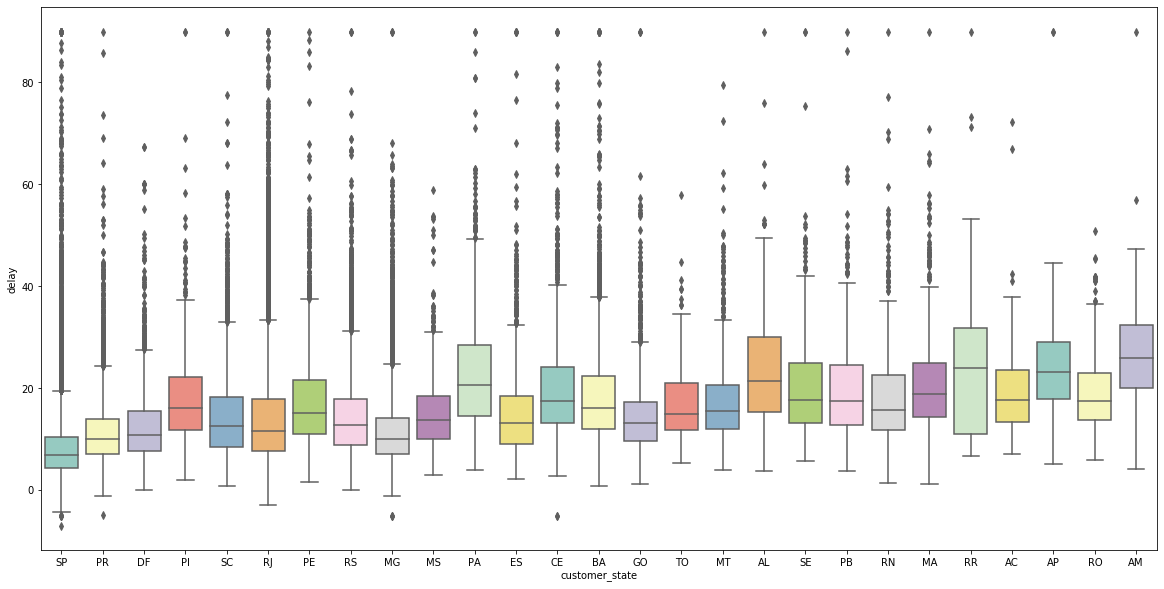

In [25]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(x="customer_state", 
            y="delay", 
            data=olist_data, palette="Set3")

# Map

In [26]:
geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                       01037       -23.545621       -46.639292   
1                       01046       -23.546081       -46.644820   
2                       01046       -23.546129       -46.642951   
3                       01041       -23.544392       -46.639499   
4                       01035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [27]:
geolocation['geolocation_zip_code_prefix_1_digits'] = geolocation['geolocation_zip_code_prefix'].str[0:1]
geolocation['geolocation_zip_code_prefix_2_digits'] = geolocation['geolocation_zip_code_prefix'].str[0:2]
geolocation['geolocation_zip_code_prefix_3_digits'] = geolocation['geolocation_zip_code_prefix'].str[0:3]
geolocation['geolocation_zip_code_prefix_4_digits'] = geolocation['geolocation_zip_code_prefix'].str[0:4]

In [28]:
geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                       01037       -23.545621       -46.639292   
1                       01046       -23.546081       -46.644820   
2                       01046       -23.546129       -46.642951   
3                       01041       -23.544392       -46.639499   
4                       01035       -23.541578       -46.641607   

  geolocation_city geolocation_state geolocation_zip_code_prefix_1_digits  \
0        sao paulo                SP                                    0   
1        sao paulo                SP                                    0   
2        sao paulo                SP                                    0   
3        sao paulo                SP                                    0   
4        sao paulo                SP                                    0   

  geolocation_zip_code_prefix_2_digits geolocation_zip_code_prefix_3_digits  \
0                                   01                                  010   
1                                   01                                  010   
2                                   01                                  010   
3                                   01                                  010   
4                                   01                                  010   

  geolocation_zip_code_prefix_4_digits  
0                                 0103  
1                                 0104  
2                                 0104  
3                                 0104  
4                                 0103

In [29]:
geolocation['geolocation_zip_code_prefix'].value_counts().to_frame().describe()

geolocation_zip_code_prefix
count                 19015.000000
mean                     52.598633
std                      72.057907
min                       1.000000
25%                      10.000000
50%                      29.000000
75%                      66.500000
max                    1146.000000

In [30]:
# Removing some outliers
#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
geolocation = geolocation.loc[geolocation.geolocation_lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geolocation = geolocation.loc[geolocation.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geolocation = geolocation.loc[geolocation.geolocation_lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geolocation = geolocation.loc[geolocation.geolocation_lng <=  -34.79314722]


In [31]:
# treat the latitute and longitude coordinates and transform then to Mercator x/y Coordinates.
from datashader.utils import lnglat_to_meters as webm
X,y = webm(geolocation.geolocation_lat,geolocation.geolocation_lng)
geolocation['X'] = pd.Series(X)
geolocation['y'] = pd.Series(y)

In [32]:
geolocation.loc[geolocation.geolocation_zip_code_prefix=='13848']

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
319695                       13848       -22.331249       -46.922580   
319710                       13848       -22.342774       -46.927142   
319716                       13848       -22.354149       -46.918990   
319730                       13848       -22.322905       -46.922931   
319731                       13848       -22.355575       -46.917066   
...                            ...              ...              ...   
323705                       13848       -22.355852       -46.920521   
323768                       13848       -22.345320       -46.930117   
323814                       13848       -22.353016       -46.928870   
323837                       13848       -22.333353       -46.919353   
323850                       13848       -22.341834       -46.943397   

       geolocation_city geolocation_state  \
319695       mogi guaçu                SP   
319710       mogi-guacu                SP   
319716       mogi-guacu                SP   
319730       mogi-guacu                SP   
319731       mogi-guacu                SP   
...                 ...               ...   
323705       mogi-guacu                SP   
323768       mogi-guacu                SP   
323814       mogi-guacu                SP   
323837       mogi guaçu                SP   
323850       mogi guacu                SP   

       geolocation_zip_code_prefix_1_digits  \
319695                                    1   
319710                                    1   
319716                                    1   
319730                                    1   
319731                                    1   
...                                     ...   
323705                                    1   
323768                                    1   
323814                                    1   
323837                                    1   
323850                                    1   

       geolocation_zip_code_prefix_2_digits  \
319695                                   13   
319710                                   13   
319716                                   13   
319730                                   13   
319731                                   13   
...                                     ...   
323705                                   13   
323768                                   13   
323814                                   13   
323837                                   13   
323850                                   13   

       geolocation_zip_code_prefix_3_digits  \
319695                                  138   
319710                                  138   
319716                                  138   
319730                                  138   
319731                                  138   
...                                     ...   
323705                                  138   
323768                                  138   
323814                                  138   
323837                                  138   
323850                                  138   

       geolocation_zip_code_prefix_4_digits             X             y  
319695                                 1384 -2.485903e+06 -5.929446e+06  
319710                                 1384 -2.487186e+06 -5.930190e+06  
319716                                 1384 -2.488452e+06 -5.928861e+06  
319730                                 1384 -2.484974e+06 -5.929503e+06  
319731                                 1384 -2.488611e+06 -5.928548e+06  
...                                     ...           ...           ...  
323705                                 1384 -2.488642e+06 -5.929111e+06  
323768                                 1384 -2.487470e+06 -5.930675e+06  
323814                                 1384 -2.488326e+06 -5.930472e+06  
323837                                 1384 -2.486137e+06 -5.928920e+06  
323850                                 1384 -2.487082e+06 -5.932840e+06  

[194 rows x 11 co

In [33]:
olist_data.head()

category product_category_name  item shipping_limit_date   price  \
0  perfumery            perfumaria     1 2018-04-30 17:33:54   10.91   
1  perfumery            perfumaria     1 2018-07-06 19:31:03  268.38   
2  perfumery            perfumaria     1 2018-04-27 19:31:35    7.65   
3       toys            brinquedos     2 2018-04-27 19:31:35   29.00   
4  perfumery            perfumaria     1 2018-08-01 16:35:17  268.38   

   freight_value order_status order_purchase_timestamp   order_approved_at  \
0           7.39    delivered      2018-04-24 16:16:53 2018-04-24 19:04:19   
1          21.07    delivered      2018-07-04 18:39:28 2018-07-05 16:33:14   
2          10.55    delivered      2018-04-23 19:03:35 2018-04-24 19:17:45   
3          10.55    delivered      2018-04-23 19:03:35 2018-04-24 19:17:45   
4          18.07    delivered      2018-07-29 20:50:22 2018-07-30 18:31:13   

  order_delivered_carrier_date  ... order_estimated_delivery_date  \
0          2018-04-25 17:01:00  ...                    2018-05-09   
1          2018-07-05 13:21:00  ...                    2018-07-27   
2          2018-04-24 16:22:36  ...                    2018-05-15   
3          2018-04-24 16:22:36  ...                    2018-05-15   
4          2018-08-01 15:24:00  ...                    2018-08-15   

  review_score  seller_zip_code_prefix           seller_city seller_state  \
0            5                   03694             sao paulo           SP   
1            4                   03694             sao paulo           SP   
2            5                   03694             sao paulo           SP   
3            5                   13232  campo limpo paulista           SP   
4            3                   03694             sao paulo           SP   

  customer_zip_code_prefix customer_city customer_state     delay  delay_est  
0                    13848    mogi-guacu             SP  2.901366  14.205336  
1                    84200   jaguariaiva             PR  5.250984  21.310255  
2                    03804     sao paulo             SP  1.156181  20.196007  
3                    03804     sao paulo             SP  1.156181  20.196007  
4                    71920      brasilia             DF  7.003854  15.228322  

[5 rows x 21 columns]

In [34]:
olist_geo = pd.merge(geolocation,
                    olist_data,
                    left_on='geolocation_zip_code_prefix',
                    right_on='customer_zip_code_prefix')

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
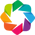

In [36]:
import holoviews as hv
import geoviews as gv
import datashader as ds
from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr
from datashader.colors import colormap_select, Greys9
from holoviews.streams import RangeXY
from holoviews.operation.datashader import datashade, dynspread, rasterize
from bokeh.io import push_notebook, show, output_notebook
output_notebook()
hv.extension('bokeh')
%opts Overlay [width=800 height=600 toolbar='above' xaxis=None yaxis=None]
%opts QuadMesh [tools=['hover'] colorbar=True] (alpha=0 hover_alpha=0.2)

T = 0.05
PX = 1

def plot_map(data, label, agg_data, agg_name, cmap):
    url="http://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Dark_Gray_Base/MapServer/tile/{Z}/{Y}/{X}.png"
    geomap = gv.WMTS(url)
    points = hv.Points(gv.Dataset(data, kdims=['X', 'y'], vdims=[agg_name]))
    agg = datashade(points, element_type=gv.Image, aggregator=agg_data, cmap=cmap)
    zip_codes = dynspread(agg, threshold=T, max_px=PX)
    hover = hv.util.Dynamic(rasterize(points, aggregator=agg_data, width=50, height=25, streams=[RangeXY]), operation=hv.QuadMesh)
    hover = hover.options(cmap=cmap)
    img = geomap * zip_codes * hover
    img = img.relabel(label)
    return img

In [37]:
brazil_geo = geolocation.set_index('geolocation_zip_code_prefix_3_digits').copy()

In [38]:
gp = olist_geo.groupby('geolocation_zip_code_prefix_3_digits')['delay'].mean().to_frame()
delay_time = brazil_geo.join(gp)
agg_name = 'avg_delay_time'
delay_time[agg_name] = delay_time['delay']


In [39]:
delay_time.count()

geolocation_zip_code_prefix             1000121
geolocation_lat                         1000121
geolocation_lng                         1000121
geolocation_city                        1000121
geolocation_state                       1000121
geolocation_zip_code_prefix_1_digits    1000121
geolocation_zip_code_prefix_2_digits    1000121
geolocation_zip_code_prefix_4_digits    1000121
X                                       1000121
y                                       1000121
delay                                    999919
avg_delay_time                           999919
dtype: int64

In [41]:
plot_map(delay_time,
         'Orders Average Delay Time (days)',
         ds.mean(agg_name), 
         agg_name, 
         cmap=bjy)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [X,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [X,y]   (avg_delay_time)

In [46]:
revenue.describe()

geolocation_lat  geolocation_lng             X             y  \
count     1.000121e+06     1.000121e+06  1.000121e+06  1.000121e+06   
mean     -2.117779e+01    -4.639142e+01 -2.357501e+06 -5.871402e+06   
std       5.707716e+00     4.260789e+00  6.353801e+05  7.081857e+05   
min      -3.369262e+01    -7.293075e+01 -3.750645e+06 -1.209716e+07   
25%      -2.360355e+01    -4.857322e+01 -2.627535e+06 -6.202754e+06   
50%      -2.291941e+01    -4.663789e+01 -2.551377e+06 -5.883168e+06   
75%      -1.997985e+01    -4.376810e+01 -2.224146e+06 -5.429626e+06   
max       4.482242e+00    -3.479369e+01  4.989609e+05 -4.135879e+06   

              price        revenue  
count  9.999190e+05  999919.000000  
mean   5.837766e+06    5837.765638  
std    7.446083e+06    7446.083135  
min    9.570000e+01       0.095700  
25%    1.345582e+06    1345.581610  
50%    3.348036e+06    3348.035860  
75%    6.940511e+06    6940.511380  
max    4.829075e+07   48290.746580

In [50]:
olist_data.head()

category product_category_name  item shipping_limit_date   price  \
0  perfumery            perfumaria     1 2018-04-30 17:33:54   10.91   
1  perfumery            perfumaria     1 2018-07-06 19:31:03  268.38   
2  perfumery            perfumaria     1 2018-04-27 19:31:35    7.65   
3       toys            brinquedos     2 2018-04-27 19:31:35   29.00   
4  perfumery            perfumaria     1 2018-08-01 16:35:17  268.38   

   freight_value order_status order_purchase_timestamp   order_approved_at  \
0           7.39    delivered      2018-04-24 16:16:53 2018-04-24 19:04:19   
1          21.07    delivered      2018-07-04 18:39:28 2018-07-05 16:33:14   
2          10.55    delivered      2018-04-23 19:03:35 2018-04-24 19:17:45   
3          10.55    delivered      2018-04-23 19:03:35 2018-04-24 19:17:45   
4          18.07    delivered      2018-07-29 20:50:22 2018-07-30 18:31:13   

  order_delivered_carrier_date  ... order_estimated_delivery_date  \
0          2018-04-25 17:01:00  ...                    2018-05-09   
1          2018-07-05 13:21:00  ...                    2018-07-27   
2          2018-04-24 16:22:36  ...                    2018-05-15   
3          2018-04-24 16:22:36  ...                    2018-05-15   
4          2018-08-01 15:24:00  ...                    2018-08-15   

  review_score  seller_zip_code_prefix           seller_city seller_state  \
0            5                   03694             sao paulo           SP   
1            4                   03694             sao paulo           SP   
2            5                   03694             sao paulo           SP   
3            5                   13232  campo limpo paulista           SP   
4            3                   03694             sao paulo           SP   

  customer_zip_code_prefix customer_city customer_state     delay  delay_est  
0                    13848    mogi-guacu             SP  2.901366  14.205336  
1                    84200   jaguariaiva             PR  5.250984  21.310255  
2                    03804     sao paulo             SP  1.156181  20.196007  
3                    03804     sao paulo             SP  1.156181  20.196007  
4                    71920      brasilia             DF  7.003854  15.228322  

[5 rows x 21 columns]

In [51]:
olist_data['customer_zip_code_prefix_1_digits'] = olist_data['customer_zip_code_prefix'].str[0:1]
olist_data['customer_zip_code_prefix_2_digits'] = olist_data['customer_zip_code_prefix'].str[0:2]
olist_data['customer_zip_code_prefix_3_digits'] = olist_data['customer_zip_code_prefix'].str[0:3]
olist_data['customer_zip_code_prefix_4_digits'] = olist_data['customer_zip_code_prefix'].str[0:4]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda

In [55]:
gp.head()

price
customer_zip_code_prefix_3_digits          
010                                23165.44
011                                17365.95
012                                55135.37
013                                38411.02
014                                54643.71

In [56]:
gp = olist_data.groupby('customer_zip_code_prefix_3_digits')['price'].sum().to_frame()
revenue = brazil_geo.join(gp)
agg_name = 'revenue'
revenue[agg_name] = revenue['price']/1000
plot_map(revenue,
         'Orders Revenue (thousands R$)',
         ds.mean(agg_name), 
         agg_name, 
         cmap=bgy)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [X,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [X,y]   (revenue)

In [43]:
orders['count'] = 1
gp = orders.groupby(['customer_zip_code_prefix_3_digits','order_id'],as_index=False)['count'].count()
                    
                    

KeyError: 'customer_zip_code_prefix_3_digits'

# Clustering by frequency

In [43]:
total_item = olist_data.groupby('category',as_index=False).item.sum()
total_item

category  item
0   agro_industry_and_commerce   258
1             air_conditioning   353
2                          art   203
3        arts_and_craftmanship    26
4                        audio   382
..                         ...   ...
66                  stationery  2759
67      tablets_printing_image    89
68                   telephony  5035
69                        toys  4361
70               watches_gifts  6467

[71 rows x 2 columns]

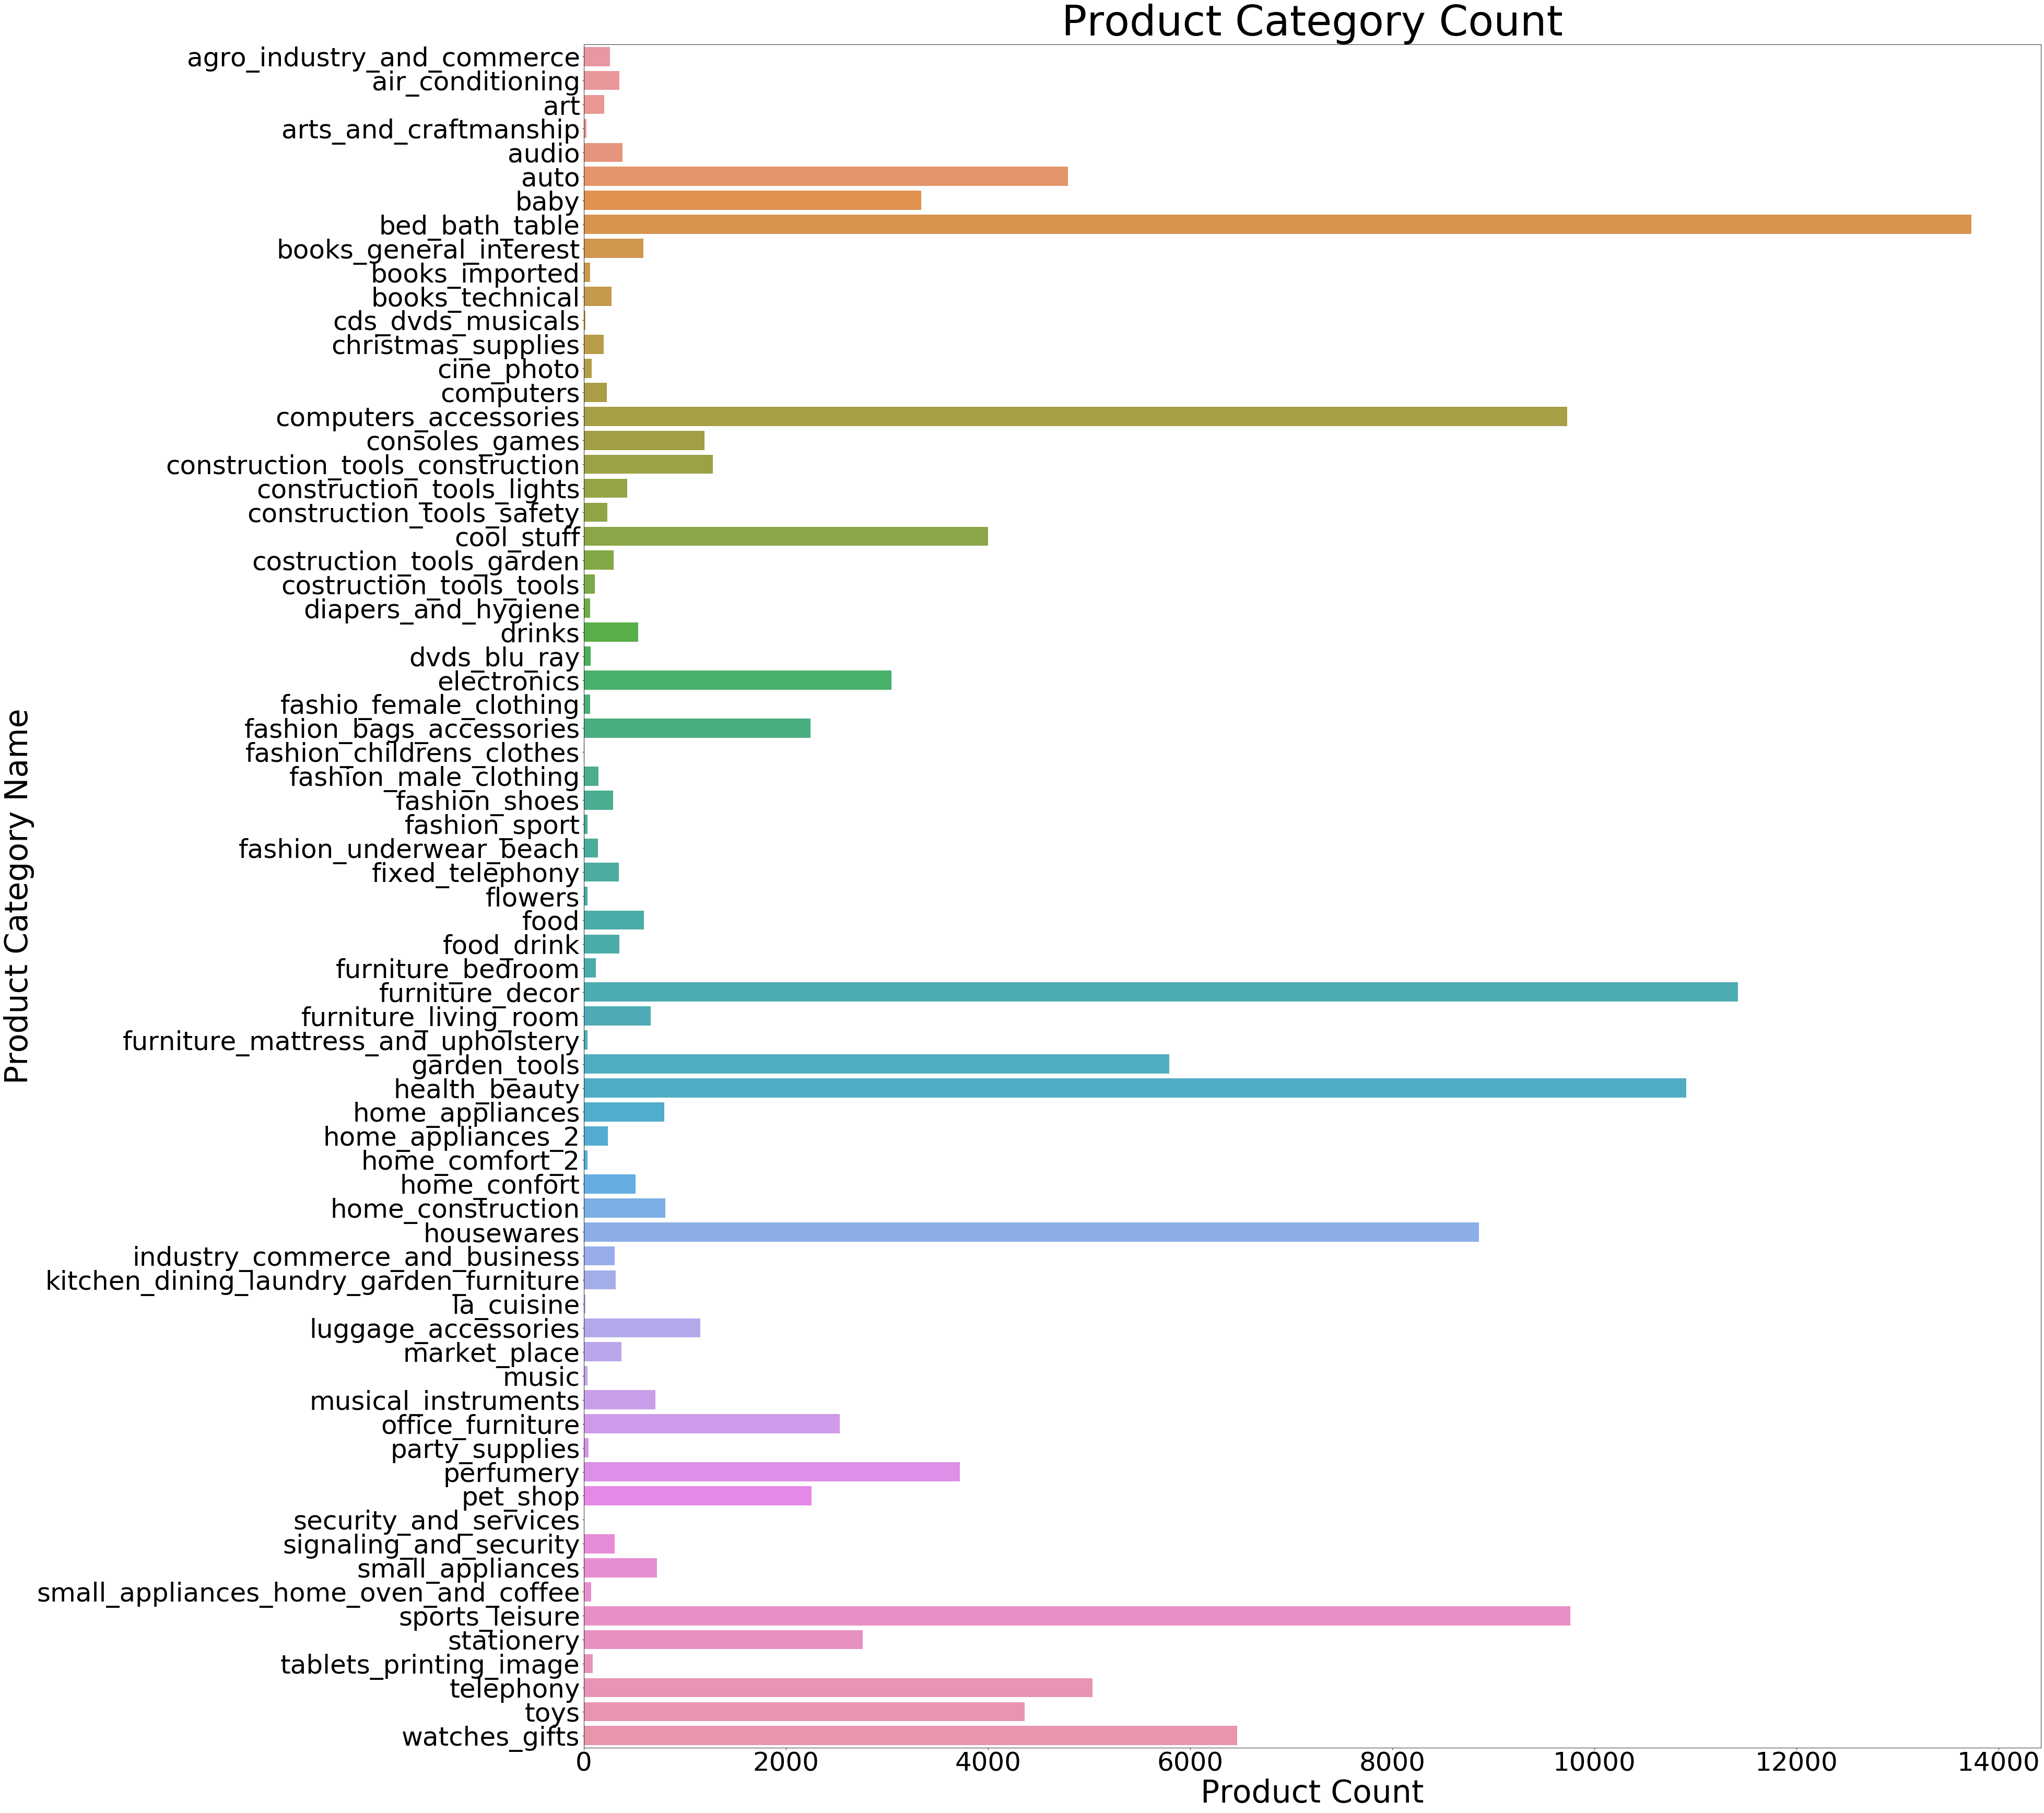

In [44]:
plt.figure(figsize=(50,60))
# orient='v'or'h':vertical or horizontal
sns.barplot(x='item',y='category',data=total_item)
# set the size of font in the ticks
plt.yticks(fontsize=50)
plt.xticks(fontsize=50)
plt.ylabel('Product Category Name',fontsize=60)
plt.xlabel('Product Count',fontsize=60)
plt.title("Product Category Count",fontsize=80)
plt.show()

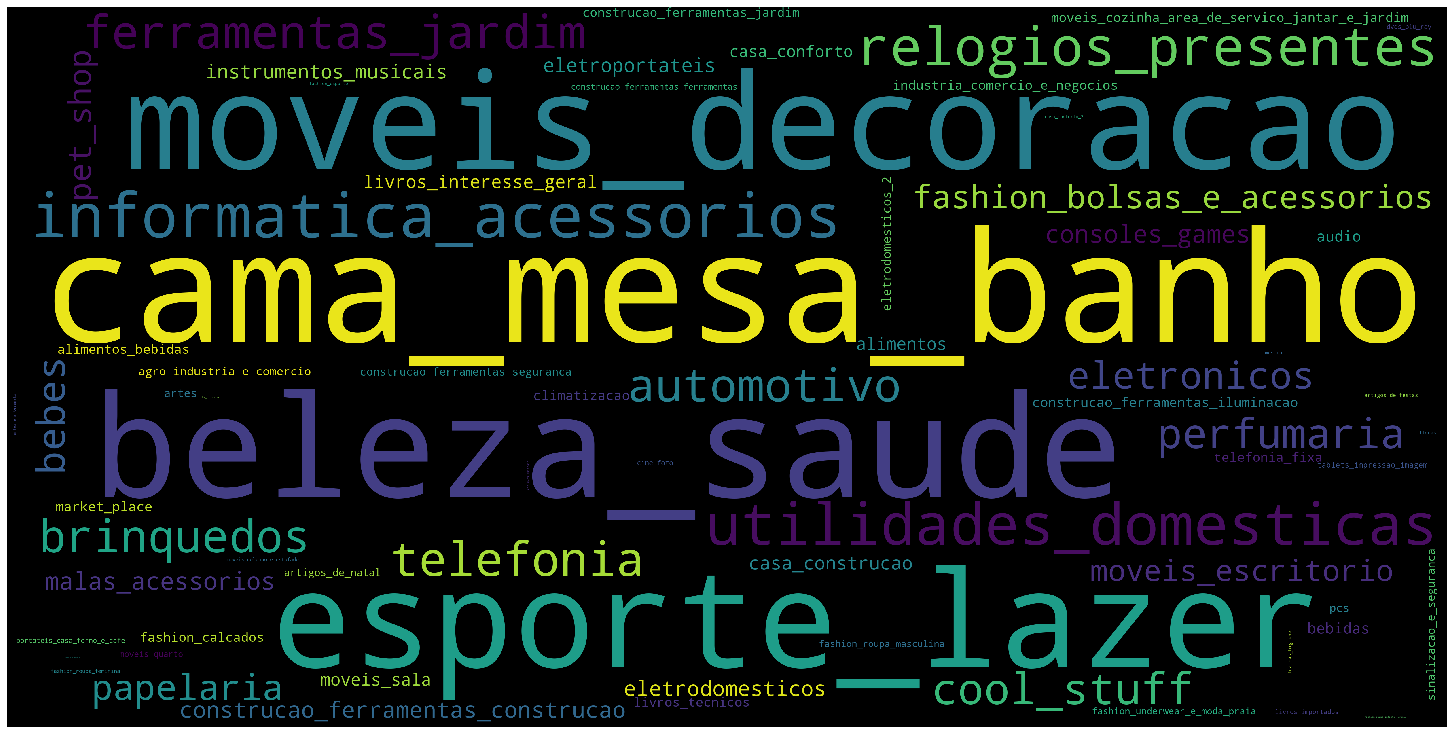

In [45]:
category_words = ' '.join(olist_data.product_category_name.sample(frac=1))
wordcloud = WordCloud(width=5000, height=2500,max_words=300)
wordcloud.generate(category_words)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

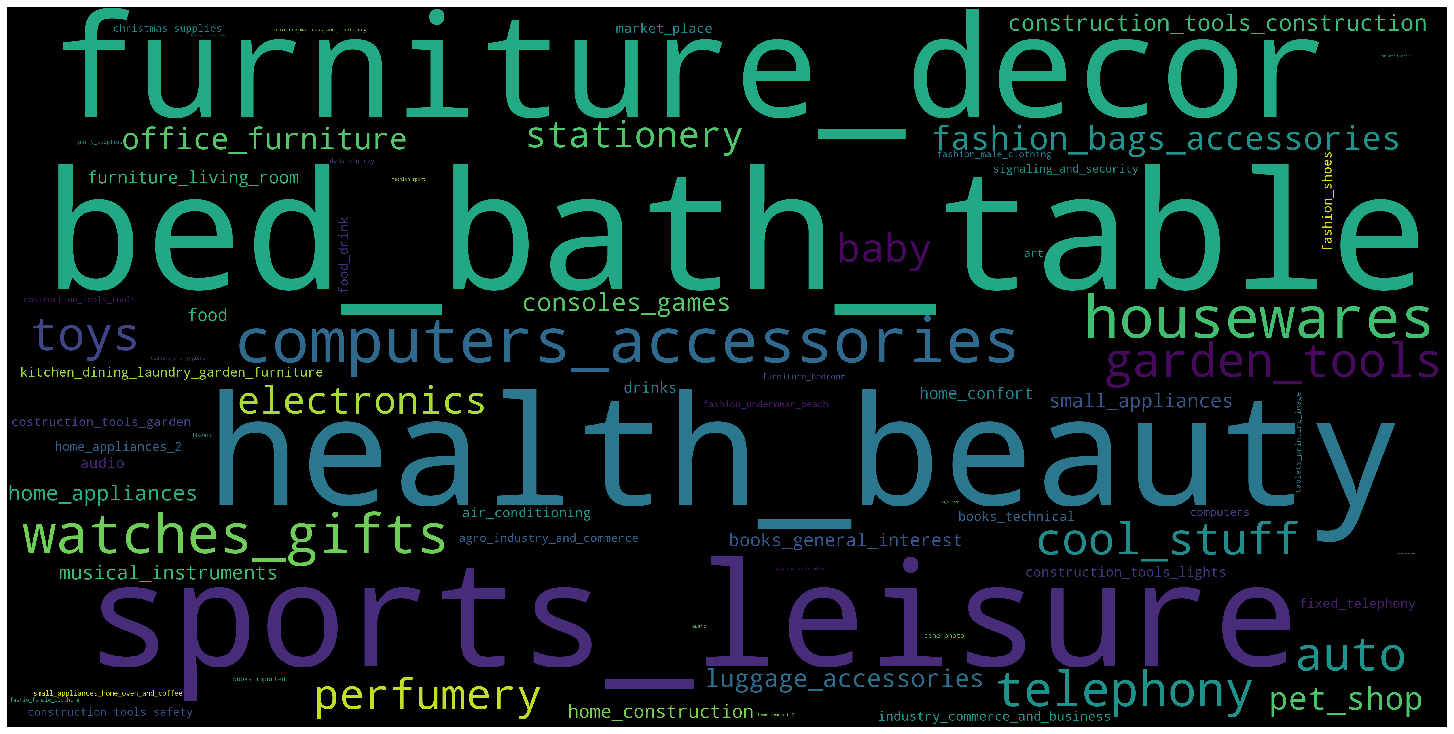

In [46]:
category_words = ' '.join(olist_data.category.sample(frac=1))
wordcloud = WordCloud(width=5000, height=2500,max_words=300)
wordcloud.generate(category_words)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [47]:
high_frequency = total_item.loc[total_item.item>total_item.item.quantile(q=2/3)]
mid_frequency = total_item.loc[(total_item.item>=total_item.item.quantile(q=1/3))&
                             (total_item.item<=total_item.item.quantile(q=2/3))]

low_frequency = total_item.loc[total_item.item<total_item.item.quantile(q=1/3)]


:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [X,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [X,y]   (total_item)

In [81]:
reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [3]:
reviews['num_letters'] = reviews.review_comment_message.str.count('[a-zA-Z]')


In [4]:
reviews_data = reviews.loc[reviews.num_letters>0]

In [21]:
comment_list = []
for translation in translations:
    comment_list.append(translation.text)
review_comment_english = pd.Series(a)

In [22]:
review_comment_english

0                  I received well before the deadline.
1     Congratulations lannister loved stores buy the...
2     efficient device. site in the set to this prin...
3             But rather, waging ... the value ta Good.
4     trusted seller, product ok and delivery before...
                            ...                        
95    great product came not only manual but without...
96    One of the pieces do not fit, was different di...
97                                   Excellent product.
98                                            All right
99    Delay in delivery, hated the service and NEVER...
Length: 100, dtype: object

In [24]:
reviews_test = reviews[0:100]

In [25]:
reviews_test['review_comment_english'] = review_comment_english

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
reviews_test

review_id                          order_id  \
0   7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1   80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2   228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3   e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4   f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
..                               ...                               ...   
95  71bc170a5ad41ee9dee95f82a17860a8  a90b081d0efa436e072d5328ecd904a4   
96  c5be8de5421e658a45042d6ca6a4ff64  61665389f0cccf5ec8135e3b05efc714   
97  0c8b57ea62de568f13a0e101d344977e  41bc5a3d34a8e4ef91b2e7d9500694cf   
98  edfbad2944ea758725486c3bbcd04f49  9d2aa61b374fac5dd063f36fefa602e1   
99  bbf6c18e7c5a88b6adcb69af3b971207  828a705e0645673b538e803ca75a29b6   

    review_score review_comment_title  \
0              4                  NaN   
1              5                  NaN   
2              5                  NaN   
3              5                  NaN   
4              5                  NaN   
..           ...                  ...   
95             5                  NaN   
96             5                  NaN   
97             5                  NaN   
98             3                  NaN   
99             5                  NaN   

                               review_comment_message review_creation_date  \
0                                                 NaN  2018-01-18 00:00:00   
1                                                 NaN  2018-03-10 00:00:00   
2                                                 NaN  2018-02-17 00:00:00   
3               Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4   Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
..                                                ...                  ...   
95                                                NaN  2017-08-03 00:00:00   
96                                                NaN  2017-12-12 00:00:00   
97                                                NaN  2017-07-12 00:00:00   
98                                                NaN  2018-03-28 00:00:00   
99                                                NaN  2017-10-31 00:00:00   

   review_answer_timestamp  num_letters  \
0      2018-01-18 21:46:59          NaN   
1      2018-03-11 03:05:13          NaN   
2      2018-02-18 14:36:24          NaN   
3      2017-04-21 22:02:06         31.0   
4      2018-03-02 10:26:53         82.0   
..                     ...          ...   
95     2017-08-03 23:40:22          NaN   
96     2017-12-13 22:58:34          NaN   
97     2017-07-13 01:02:28          NaN   
98     2018-03-31 03:25:49          NaN   
99     2017-11-06 18:43:24          NaN   

                               review_comment_english  
0                I received well before the deadline.  
1   Congratulations lannister loved stores buy the...  
2   efficient device. site in the set to this prin...  
3           But rather, waging ... the value ta Good.  
4   trusted seller, product ok and delivery before...  
..                                                ...  
95  great product came not only manual but without...  
96  One of the pieces do not fit, was different di...  
97                                 Excellent product.  
98                                          All right  
99  Delay in delivery, hated the service and NEVER...  

[100 rows x 9 columns]

In [5]:
pip install googletrans

Note: you may need to restart the kernel to use updated packages.


In [25]:
from translate import Translator
translator= Translator(to_lang='en',from_lang='ES')
translation = translator.translate("Tomara q dure pois é de pelinho.")


In [26]:
print(translation)

It will last for pois é de pelinho.


In [11]:
reviews_data.review_comment_message[50]

'Tomara q dure pois é de pelinho.'

In [30]:
from translate import Translator
translatedList = []
for comment in reviews_data.review_comment_message:
    translator = Translator(to_lang='en',from_lang='ES')
    try:
        translation = translator.translate(comment)
    except Exception as e:
        print(str(e))
        continue
    translatedList.append(translation)

In [31]:
translatedList[0:100]

['Recebi bem before the stipulated season.',
 'Parabéns lojas lannister adorei buy the Internet safe and practical Parabéns to all happy Páscoa',
 'efficient aparelho. Do not locate the brand of Aparelho is printed as 3 disinfector and to check this as another name ... update with the correct brand one time it is the same.',
 'More um pouco, travando ... hair value ta Boa.',
 'Reliable seller, product ok and delivery before do prazo.',
 'GOSTARIA TO KNOW OR THAT HOUVE, I ALWAYS RECEIVED E ESSA BUY AGORA I DECPCIONOU',
 'Lousy',
 'Note 10',
 'obrigado peels atençao amim dispensed',
 'A purchase was made easily. A delivery was made a long time before the given period. Or product já começou to be used and tied or present, sem problems.',
 'Very cute and cheap.',
 'Não gostei! Comprei gato por lebre',
 'I always buy the Internet and deliver it before the combined period, which I credit to be the maximum period. No stark or maximum term is ever esgotou e ainda não recebi o produto.',
 'I re

In [29]:
reviews_data.review_comment_message[0:100]

3                  Recebi bem antes do prazo estipulado.
4      Parabéns lojas lannister adorei comprar pela I...
9      aparelho eficiente. no site a marca do aparelh...
12       Mas um pouco ,travando...pelo valor ta Boa.\r\n
15     Vendedor confiável, produto ok e entrega antes...
                             ...                        
236    otimo produto só nao veio manual, mas sem prob...
237    Uma das peças não encaixava, estava de diâmetr...
238                                   Excelente produto.
239                                           Tudo certo
240    Demora na entrega, detestei o atendimento e NU...
Name: review_comment_message, Length: 100, dtype: object

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [34]:
orders.order_id.nunique()

99441

In [18]:
olist_data.head()

category product_category_name  item shipping_limit_date   price  \
0  perfumery            perfumaria     1 2018-04-30 17:33:54   10.91   
1  perfumery            perfumaria     1 2018-07-06 19:31:03  268.38   
2  perfumery            perfumaria     1 2018-04-27 19:31:35    7.65   
3       toys            brinquedos     2 2018-04-27 19:31:35   29.00   
4  perfumery            perfumaria     1 2018-08-01 16:35:17  268.38   

   freight_value order_status order_purchase_timestamp   order_approved_at  \
0           7.39    delivered      2018-04-24 16:16:53 2018-04-24 19:04:19   
1          21.07    delivered      2018-07-04 18:39:28 2018-07-05 16:33:14   
2          10.55    delivered      2018-04-23 19:03:35 2018-04-24 19:17:45   
3          10.55    delivered      2018-04-23 19:03:35 2018-04-24 19:17:45   
4          18.07    delivered      2018-07-29 20:50:22 2018-07-30 18:31:13   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2018-04-25 17:01:00           2018-04-27 16:42:17   
1          2018-07-05 13:21:00           2018-07-10 22:34:39   
2          2018-04-24 16:22:36           2018-04-25 23:02:39   
3          2018-04-24 16:22:36           2018-04-25 23:02:39   
4          2018-08-01 15:24:00           2018-08-06 18:36:46   

  order_estimated_delivery_date  review_score seller_zip_code_prefix  \
0                    2018-05-09             5                  03694   
1                    2018-07-27             4                  03694   
2                    2018-05-15             5                  03694   
3                    2018-05-15             5                  13232   
4                    2018-08-15             3                  03694   

            seller_city seller_state customer_zip_code_prefix customer_city  \
0             sao paulo           SP                    13848    mogi-guacu   
1             sao paulo           SP                    84200   jaguariaiva   
2             sao paulo           SP                    03804     sao paulo   
3  campo limpo paulista           SP                    03804     sao paulo   
4             sao paulo           SP                    71920      brasilia   

  customer_state  
0             SP  
1             PR  
2             SP  
3             SP  
4             DF

In [ ]:
olist_data.